In [1]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from operator import itemgetter, attrgetter

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size


In [2]:
def nbindingE(Z,N):  #New Binding Energy Function
    A=Z+N
    a_v  =15.422
    a_s  =16.831
    a_c  =0.686
    a_a  =26.002
    a_as =-18.711
    a_p  = 11.199
    
    if((Z%2 ==0) and (N%2==0)):
        #print("even-even")
        n=1

    elif((Z%2 !=0) and (N%2!=0)):
        n=-1
        #print("odd-odd")
    else:
        n=0
        #print("even-odd")
    
    p_1 = a_v * A
    
    p_2 = a_s * (A**(2/3))

    p_3 = a_c * ( (Z**2)/(A**(1/3)) )
    
    p_4 = a_a + a_as/(A**(1/3))
    
    p_5 = ((A-(2*Z))**2)/A
    
    p_6 = a_p*n/(A**(1/2))
    
    
    
    B= p_1 -p_2 -p_3 -p_4 * p_5 -p_6
    
    return B


In [3]:
def ki(exp,the):
    ki_2=0
    
    #print(exp_the[0], "\n\n")
    
    
    for i in range(0, len(exp)):
        ki_2=ki_2+(exp[i]-the[i])**2
    
    #print(len(exp_the)) 
    return np.sqrt(ki_2/(len(exp)))

In [4]:
def nuc_error(exp, the):
    err=abs(exp-the)/exp
    return err 


In [5]:
#SKMS_all_nuclei-new.dat
#SKP_all_nuclei.dat
#SLY4_all_nuclei-new.dat

#SV-MIN_all_nuclei-new.dat
#UNEDF0_all_nuclei-new.dat
#UNEDF1_all_nuclei-new.dat

#6 Different theoretical Models


names=["SKMS_all_nuclei-new.dat", 
       "SKP_all_nuclei.dat",
       "SLY4_all_nuclei-new.dat", 
       "SV-MIN_all_nuclei-new.dat", 
       "UNEDF0_all_nuclei-new.dat", 
       "UNEDF1_all_nuclei-new.dat"]

#Experimental: skip_header=350, skip_footer=3433-2953
skip_H=[347,  304,  287,  316,  321,  310    ]
#skip_H =[0,    0,    0,    0,    0,    0  ]

top_F=[ 8700, 7478, 7264, 7924, 8300, 8324   ]
#top_F =[0,    0,    0,    0,    0,    0  ]
#skip_F=[0,    0,    0,    0,    0,    0  ]
skip_F=[5606, 4977, 4806, 5176, 5412, 5323   ]

Z_the    =[[],[],[],[],[],[]]
N_the    =[[],[],[],[],[],[]]
A_the    =[[],[],[],[],[],[]]

y_the    =[[],[],[],[],[],[]]
y_the_d  =[{},{},{},{},{},{}]

Q_the    =[[],[],[],[],[],[]]
Q_the_d  =[{},{},{},{},{},{}]

S_p_the  =[[],[],[],[],[],[]]
S_p_the_d=[{},{},{},{},{},{}]

S_2p_the    =[[],[],[],[],[],[]]
S_2p_the_d  =[{},{},{},{},{},{}]


S_n_the    =[[],[],[],[],[],[]]
S_n_the_d  =[{},{},{},{},{},{}]


S_2n_the   =[[],[],[],[],[],[]]
S_2n_the_d =[{},{},{},{},{},{}]

X_the      =[[],[],[],[],[],[]]

ZN_the    =[[],[],[],[],[],[]]
ZN_the_d  =[{},{},{},{},{},{}]
X_the    =[[],[],[],[],[],[]]

for i in range(0,6):
    Z_the [i]   = np.genfromtxt(names[i],usecols=1, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of protons
    N_the [i]   = np.genfromtxt(names[i],usecols=2, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of neutrons
    A_the [i]   = N_the[i]+Z_the[i]                     

    y_the [i]   = -np.genfromtxt(names[i],usecols=4, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(y_the[i])):
        y_the_d[i][Z_the[i][j],N_the[i][j]]=y_the[i][j]
    
    
    Q_the [i]   = -np.genfromtxt(names[i],usecols=9, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(Q_the[i])):
        Q_the_d[i][Z_the[i][j],N_the[i][j]]=Q_the[i][j]
    
    
    S_p_the  [i]= -np.genfromtxt(names[i],usecols=5, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_p_the[i])):
        S_p_the_d[i][Z_the[i][j],N_the[i][j]]=S_p_the[i][j]
    
    
    S_2p_the [i]= -np.genfromtxt(names[i],usecols=6, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2p_the[i])):
        S_2p_the_d[i][Z_the[i][j],N_the[i][j]]=S_2p_the[i][j]
    
    
    S_n_the [i] = -np.genfromtxt(names[i],usecols=7, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_n_the[i])):
        S_n_the_d[i][Z_the[i][j],N_the[i][j]]=S_n_the[i][j]
    
    
    S_2n_the[i] = -np.genfromtxt(names[i],usecols=8, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2n_the[i])):
        S_2n_the_d[i][Z_the[i][j],N_the[i][j]]=S_2n_the[i][j]
    
    ZN_the[i]= np.transpose(np.stack( (Z_the[i],N_the[i]) ))
    
    for j in range(0,len(ZN_the[i])):
        ZN_the_d[i][Z_the[i][j], N_the[i][j]]  =ZN_the[i][j]
    
    X_the[i]= np.transpose(np.stack(  (Z_the[i],      #0
                                       N_the[i],      #1
                                       A_the[i],      #2
                                       y_the[i],      #3
                                       S_p_the[i],    #4
                                       S_n_the[i],    #5
                                       S_2p_the[i],   #6
                                       S_2n_the[i],   #7
                                       Q_the[i]) ))   #8
     

In [6]:
exp_h=350
exp_f=3433-3046

N_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3, skip_header=exp_h, skip_footer=exp_f)
Z_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4, skip_header=exp_h, skip_footer=exp_f)
A_exp    = N_exp+Z_exp                                                        #Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y_exp    = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5, skip_header=exp_h, skip_footer=exp_f)

S_p_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=12, skip_header=exp_h, skip_footer=exp_f)
S_2p_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=18, skip_header=exp_h, skip_footer=exp_f)

S_n_exp  =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=9, skip_header=exp_h, skip_footer=exp_f)
S_2n_exp =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=15, skip_header=exp_h, skip_footer=exp_f)


ZN_exp   = np.transpose(np.stack((Z_exp, N_exp)))
X_exp    = np.transpose(np.stack((Z_exp, N_exp,   A_exp,   y_exp,   S_p_exp,   S_n_exp,   S_2p_exp,   S_2n_exp)))

y_exp_d={}
S_n_exp_d={}
S_2n_exp_d={}
S_p_exp_d={}
S_2p_exp_d={}

for i in range(0,len(N_exp)):
    y_exp_d[     Z_exp[i],   N_exp[i]]=  y_exp[i]
    
    S_n_exp_d[   Z_exp[i],   N_exp[i]]=  S_n_exp[i]
    S_2n_exp_d[  Z_exp[i],   N_exp[i]]=  S_2n_exp[i]
    
    S_p_exp_d[   Z_exp[i],   N_exp[i]]=  S_p_exp[i]
    S_2p_exp_d[  Z_exp[i],   N_exp[i]]=  S_2p_exp[i]


(2548, 8)


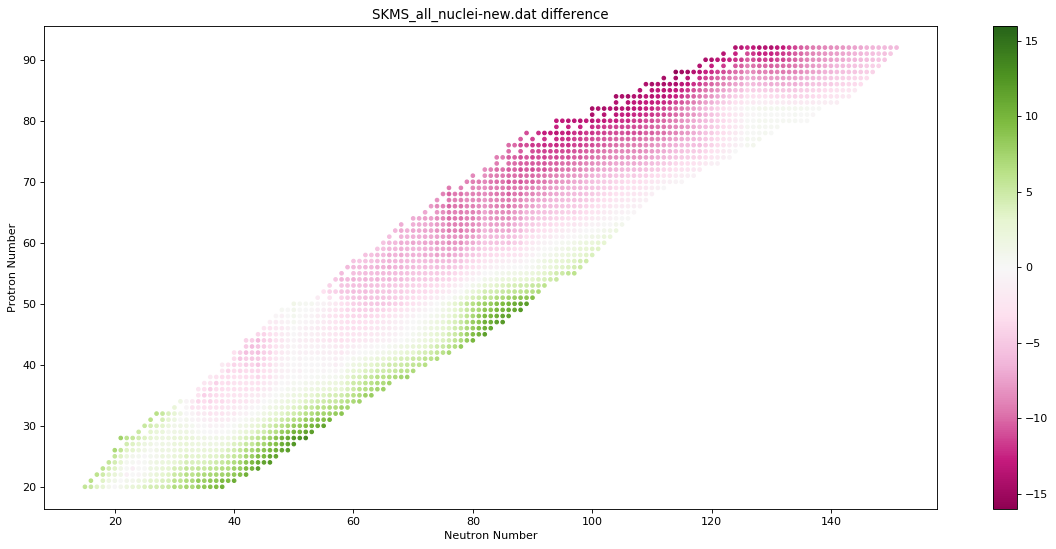

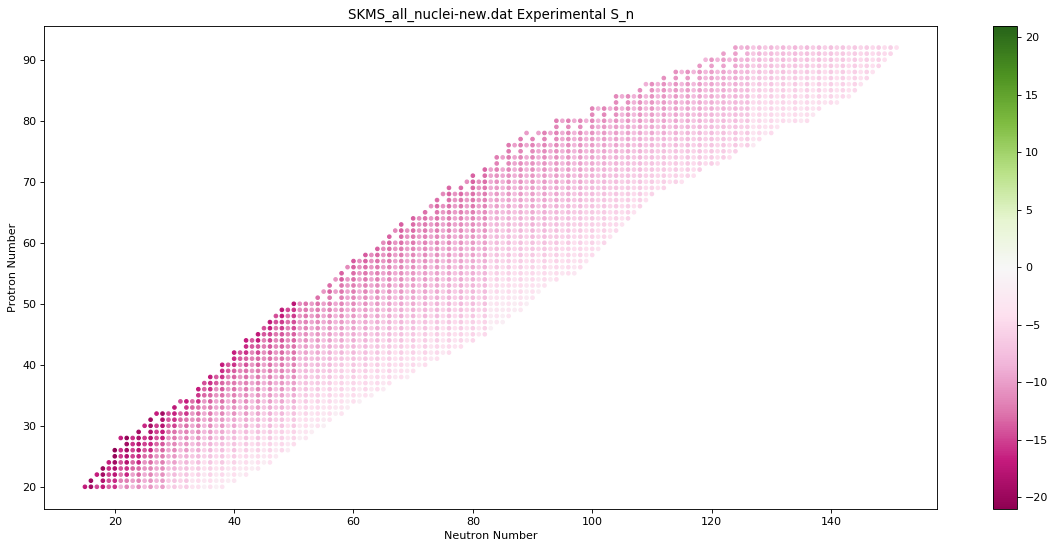

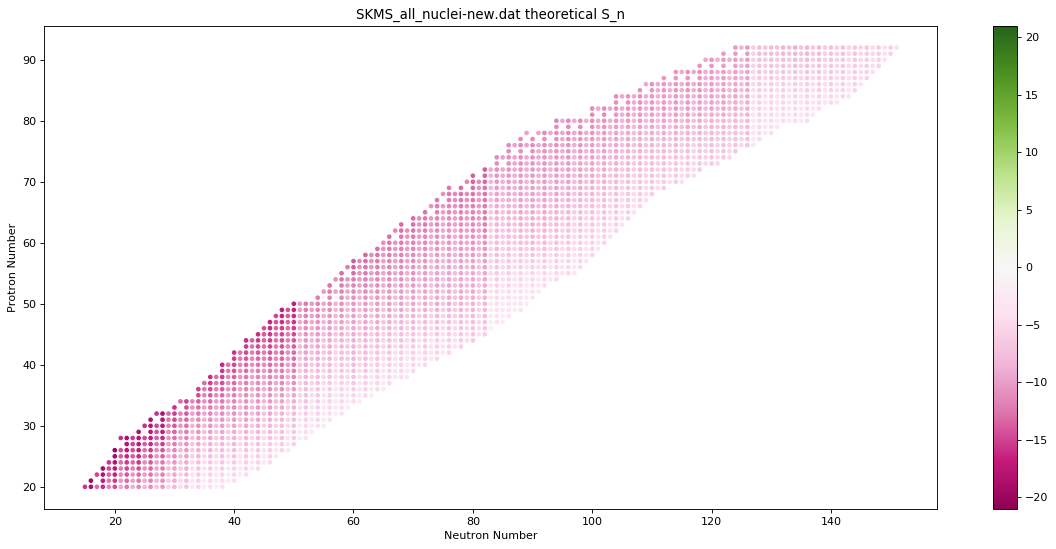

(2575, 8)


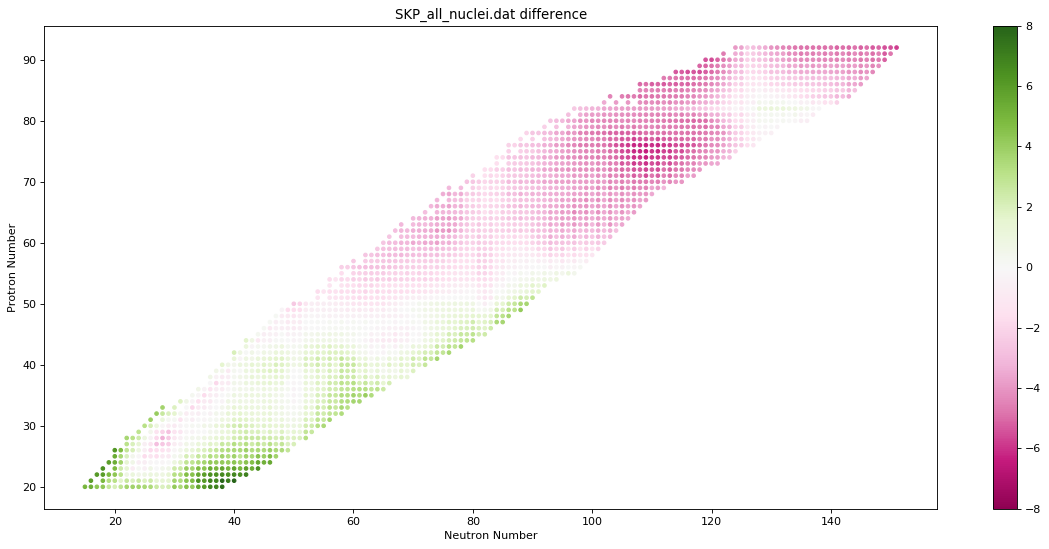

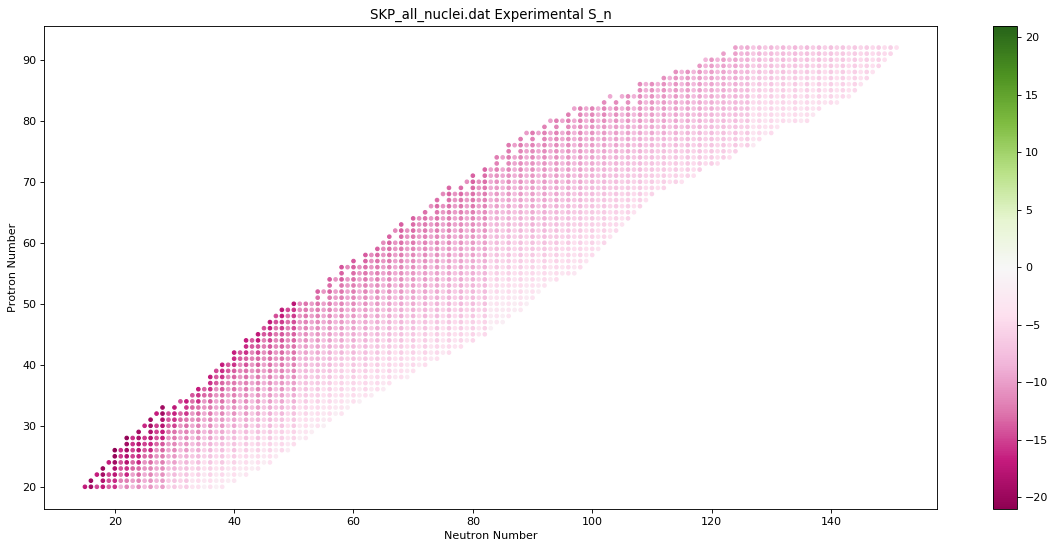

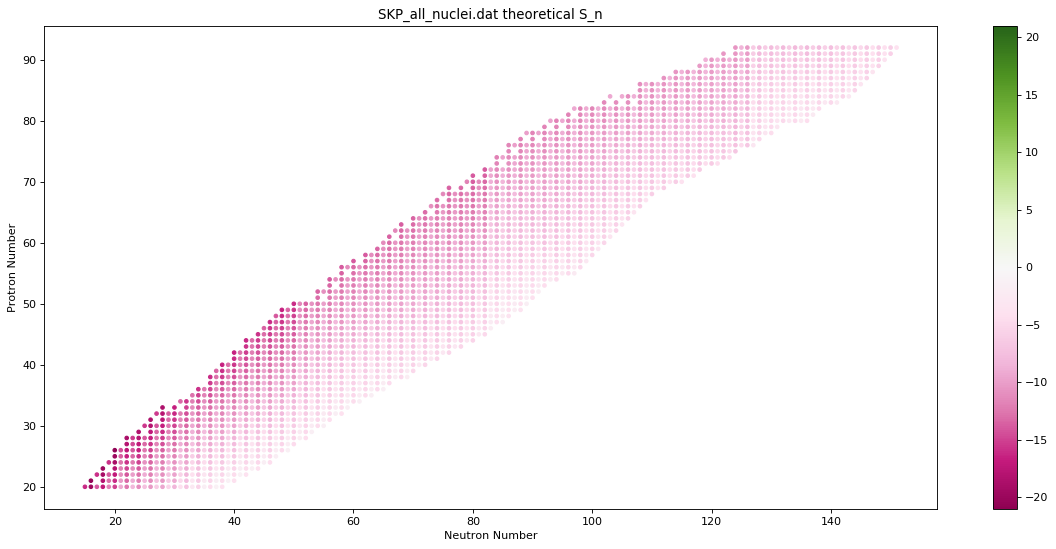

(2575, 8)


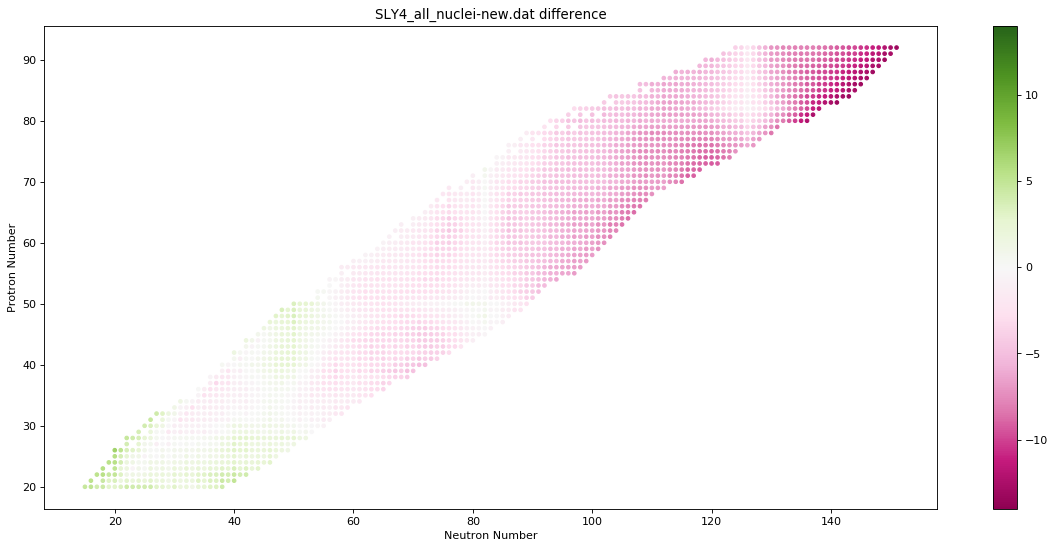

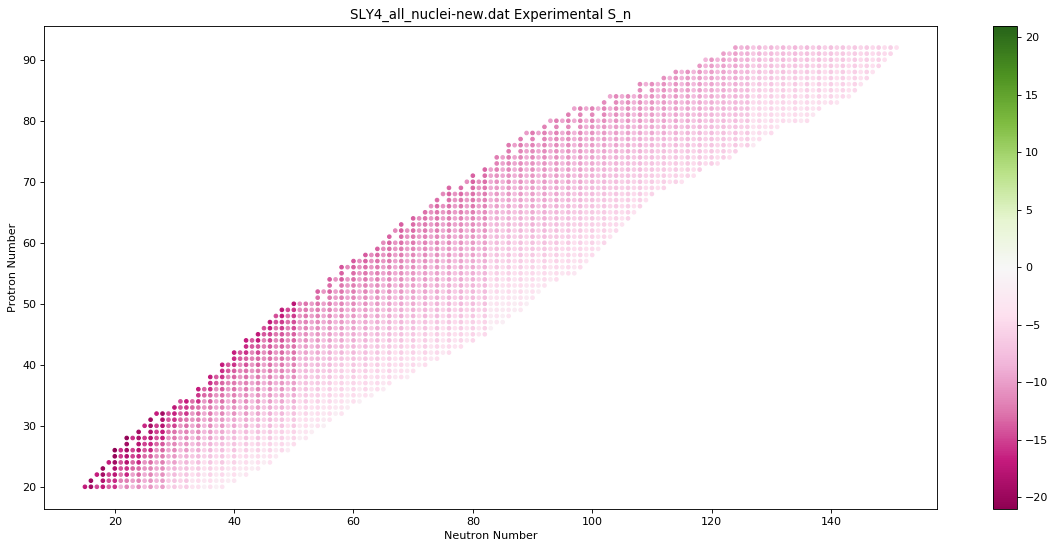

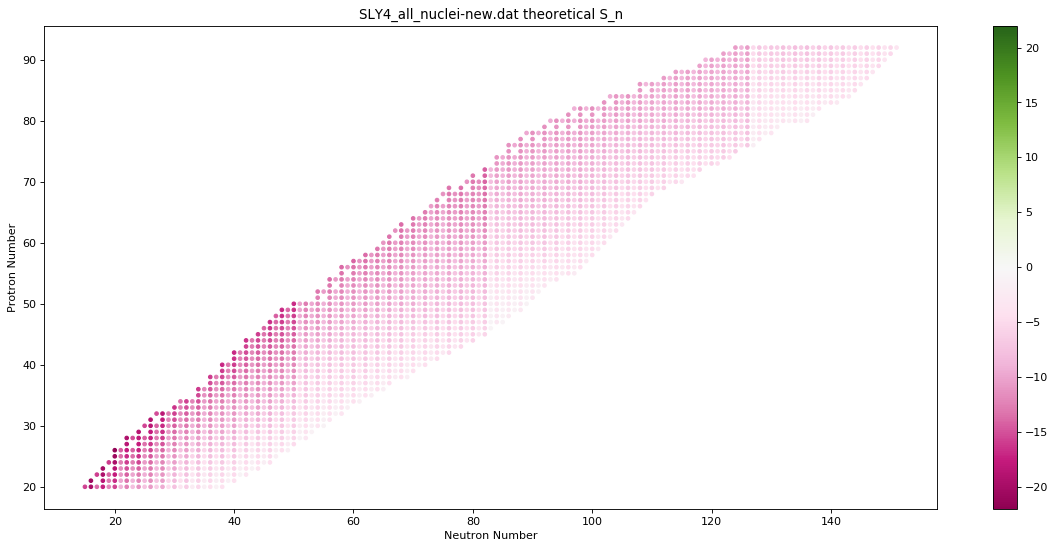

(2572, 8)


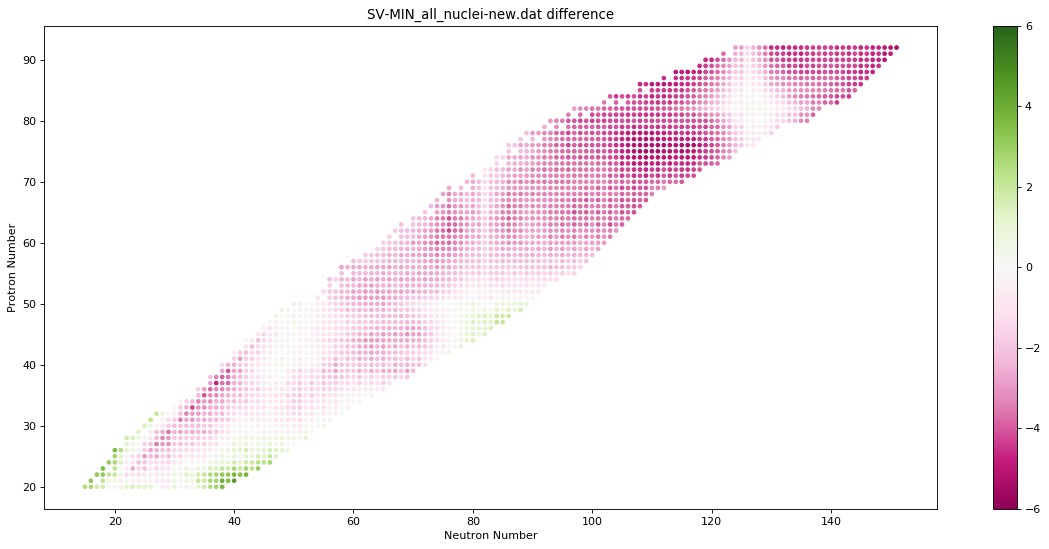

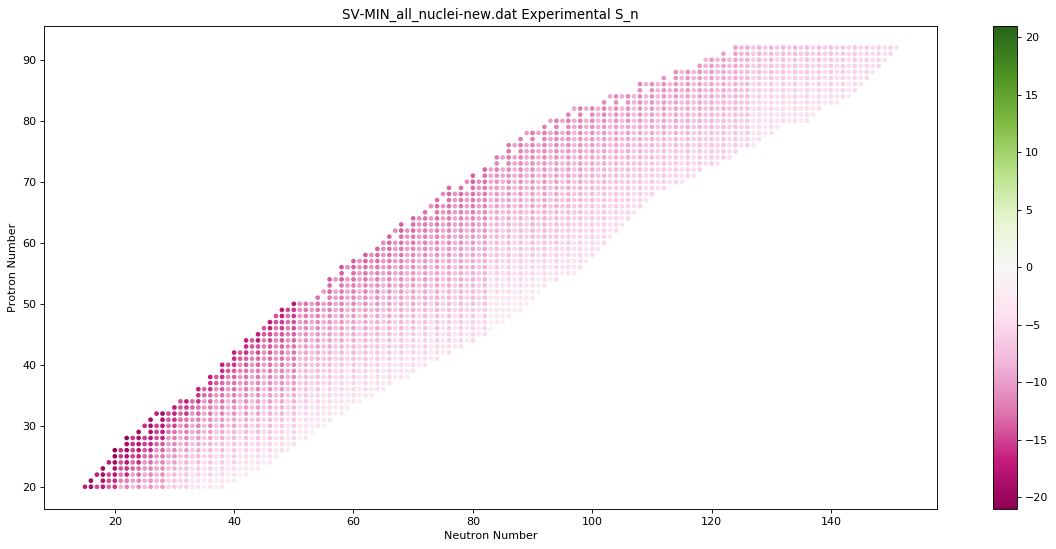

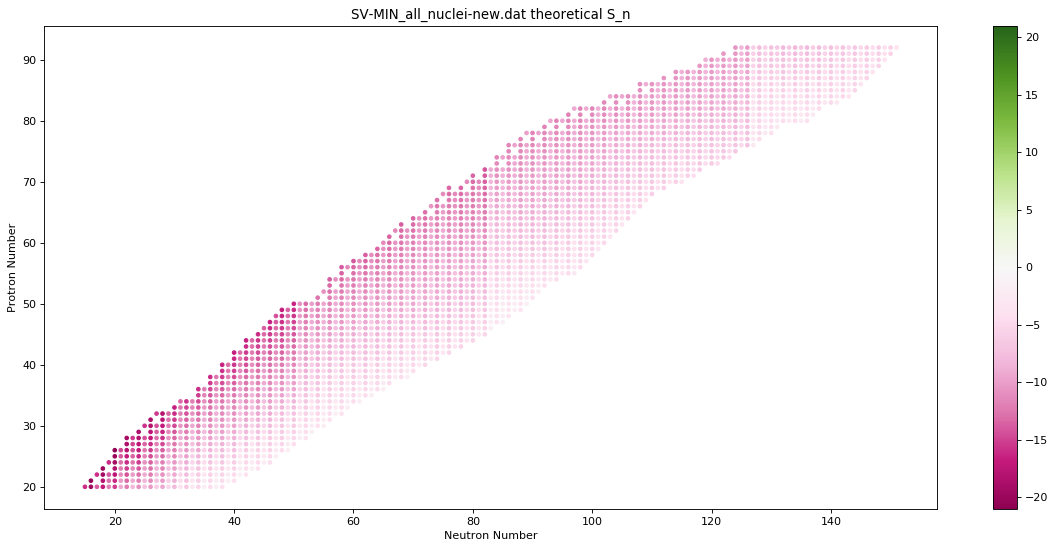

(2570, 8)


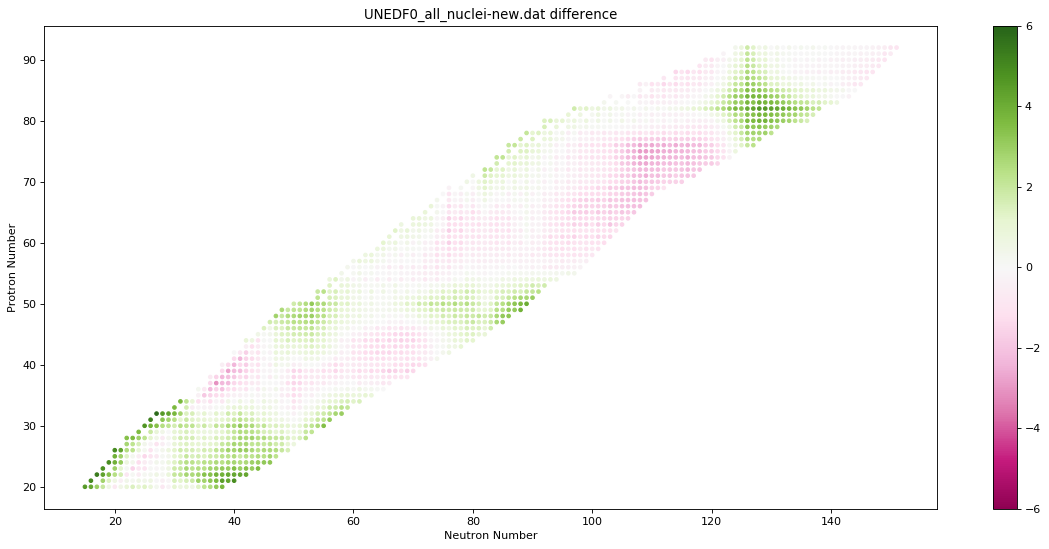

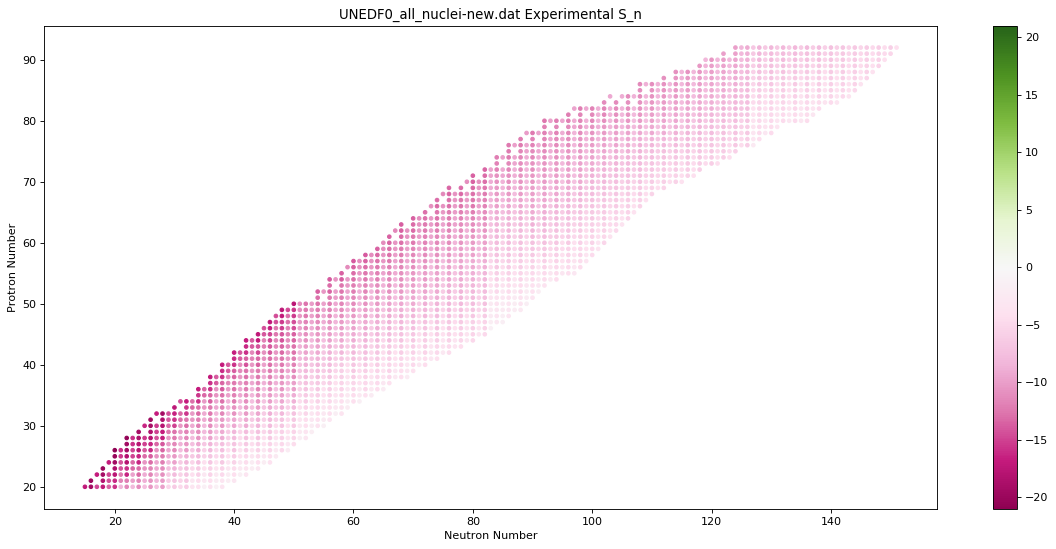

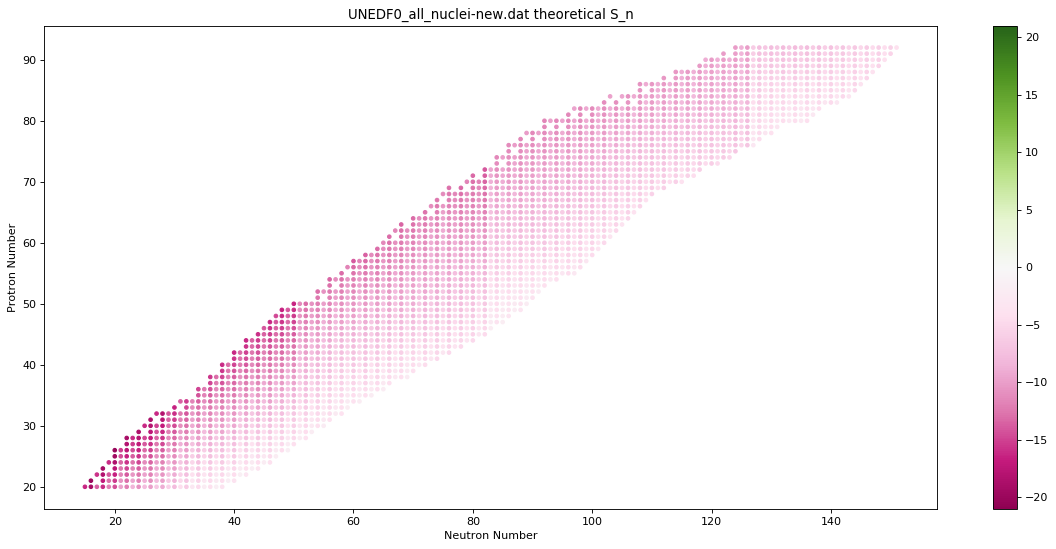

(2580, 8)


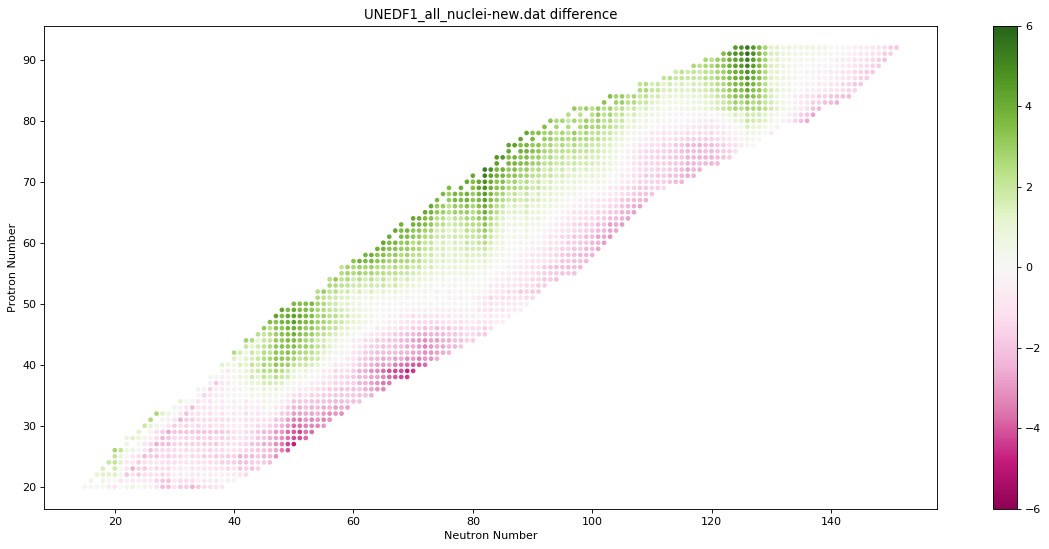

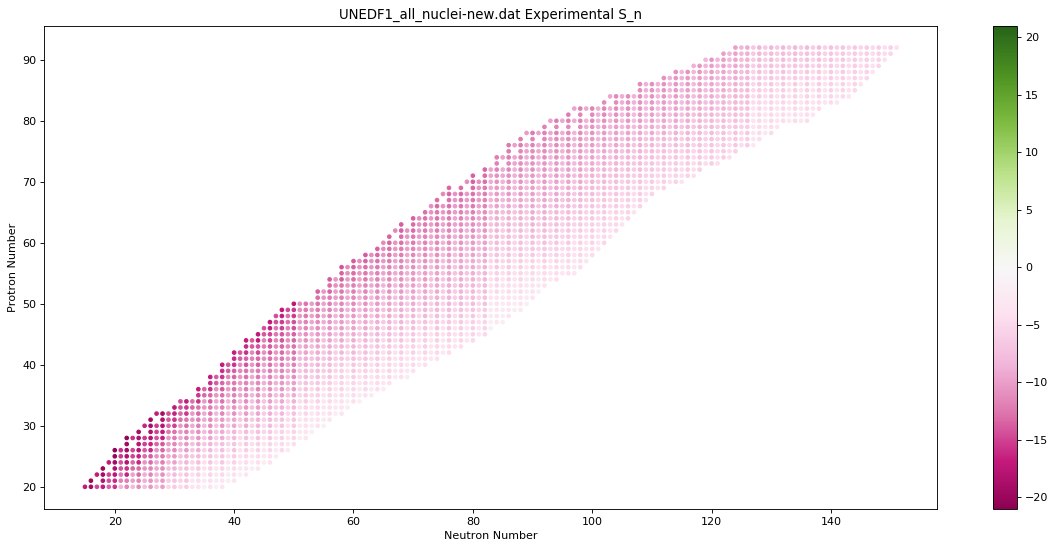

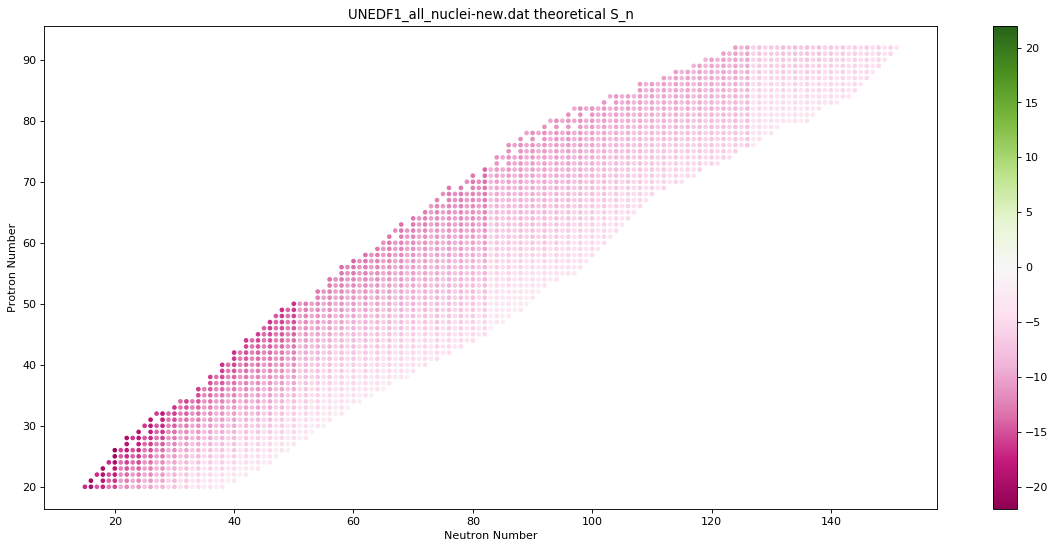

In [134]:
y_mat_the         =[[],[],[],[],[],[]]
y_mat_exp         =[[],[],[],[],[],[]]    
ZN_y_mat          =[[],[],[],[],[],[]]

S_n_mat_the       =[[],[],[],[],[],[]]
S_n_mat_exp       =[[],[],[],[],[],[]]

S_n_mat_the_d     =[{},{},{}, {},{},{}]
S_n_mat_exp_d     =[{},{},{}, {},{},{}]

y_mat_the_d       =[{},{},{}, {},{},{},]
y_mat_exp_d       =[{},{},{}, {},{},{},]

y_of_Q_mat_the_d  =[{},{},{}, {},{},{},]

#Matching experimental and theoretical data values 
X_all          =[[],[],[],[],[],[]]
diff_w_Snexp   =[[],[],[],[],[],[]]
diff_w_Snexp_d =[{},{},{}, {},{},{},]


ZN_diff_w_Snexp=[[],[],[],[],[],[]]
ZQ_diff_w_Snexp=[[],[],[],[],[],[]]

for i in range(0,6):
    for ZN_exp_i in ZN_exp:
        try:
            #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]
            S_n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]
            Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]
            S_n_exp_d[ZN_exp_i[0],ZN_exp_i[1]]
            #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            
            if(S_n_exp_d[ZN_exp_i[0],ZN_exp_i[1]] !=0 ):
                
                ZN_diff_w_Snexp[i].append((ZN_exp_i[0],ZN_exp_i[1]))
                ZQ_diff_w_Snexp[i].append((ZN_exp_i[0],Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]))
                
                diff_w_Snexp[i].append((y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]-y_exp_d[ZN_exp_i[0],ZN_exp_i[1]],
                                    S_n_exp_d[ZN_exp_i[0],ZN_exp_i[1]]))
                
                diff_w_Snexp_d[i][ZN_exp_i[0],ZN_exp_i[1]]=(y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]-y_exp_d[ZN_exp_i[0],ZN_exp_i[1]],
                                    S_n_exp_d[ZN_exp_i[0],ZN_exp_i[1]])
                
                
                S_n_mat_the[i].append(S_n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])

                X_all[i].append((ZN_exp_i[0], 
                                 ZN_exp_i[1], 
                                 y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]-y_exp_d[ZN_exp_i[0],ZN_exp_i[1]], 
                                 y_exp_d[ZN_exp_i[0],ZN_exp_i[1]],
                                 y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]],
                                 S_n_exp_d[ZN_exp_i[0],ZN_exp_i[1]],
                                 S_n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]],
                                 Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]))

        except KeyError:
            continue
        
                                
        
            
for i in range(0,6):   
    print(np.shape(X_all[i]))  
    X_all[i]=np.transpose(X_all[i])
    
    
    ext = np.int(np.ceil(max(-np.min(X_all[i][2]),np.max(X_all[i][2]))))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(X_all[i][1],X_all[i][0],c=X_all[i][2],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i]+" difference")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(X_all[i][5]),np.max(X_all[i][5]))))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(X_all[i][1],X_all[i][0],c=X_all[i][5],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i]+" Experimental S_n")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(X_all[i][6]),np.max(X_all[i][6]))))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(X_all[i][1],X_all[i][0],c=X_all[i][6],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i]+" theoretical S_n")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    


In [135]:

for i in range(0,6):
    print("diff_w_Snexp[i] of i:", i)
    print(np.shape(diff_w_Snexp[i]))
    print(np.shape(ZQ_diff_w_Snexp[i]))
    
    print(diff_w_Snexp[i][0])
    print(diff_w_Snexp[i][1])
    print(diff_w_Snexp[i][2])
    print(diff_w_Snexp[i][3])
    print("\n")
    X_all[i]=np.transpose(X_all[i])
    print("X_all[i] of i:", i)
    print(np.shape(X_all[i]))
    print(X_all[i][0])
    print(X_all[i][1])
    print(X_all[i][2])
    print(X_all[i][3])
    print("\n")
rf_ZQ_name[i]    
    
    

diff_w_Snexp[i] of i: 0
(2548, 2)
(2548, 2)
(5.715212000000008, -17.109)
(5.247834000000012, -19.326644)
(3.535693999999978, -14.756228)
(2.564614000000006, -16.993762)


X_all[i] of i: 0
(2548, 8)
[ 20.        15.         5.715212 262.026409 267.741621 -17.109
 -15.608564   7.480085]
[ 20.        16.         5.247834 281.353053 286.600887 -19.326644
 -18.859266   6.186146]
[ 20.        17.         3.535694 296.109281 299.644975 -14.756228
 -13.044088   5.623388]
[ 20.        18.         2.564614 313.103043 315.667657 -16.993762
 -16.022682   4.695803]


diff_w_Snexp[i] of i: 1
(2575, 2)
(2575, 2)
(5.060795999999982, -17.109)
(5.261177000000032, -19.326644)
(4.296209999999974, -14.756228)
(4.2683869999999615, -16.993762)


X_all[i] of i: 1
(2575, 8)
[ 20.        15.         5.060796 262.026409 267.087205 -17.109
 -16.199005   7.131568]
[ 20.        16.         5.261177 281.353053 286.61423  -19.326644
 -19.527025   7.615017]
[ 20.        17.         4.29621  296.109281 300.405491 -14.7

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [136]:
rf_ZQ_name=["a",
            "b",
            "c",
            "d",
            "e",
            "f",]

ml_predictions=[ [],[],[], [],[],[], ]


for i in range(0,6):
    
    rf_ZQ_name[i]=RandomForestRegressor(n_estimators=1000)
    X_train, X_test, y_train, y_test = train_test_split(ZQ_diff_w_Snexp[i],diff_w_Snexp[i], test_size =0.25, random_state=42 )
    
    print(np.shape(X_train))
    print(X_train[0])
    print(y_train[0])
    
    print(np.shape(X_test))
    print(np.shape(y_train))
    print(np.shape(y_test))
    
    rf_ZQ_name[i].fit(X_train,y_train) 
    
    ml_predictions[i]=rf_ZQ_name[i].predict(ZQ_diff_w_Snexp[i])
    
    #rf_ZQ_score[i] =rf_ZQ_name[i].score(ZQ_mat[i], diff[i])
    #rf_ZQ_sigma[i] =ki(diff[i], ZQ_ml[i])
    
    print(names[i])
    print("ZQ_ml: train score", rf_ZQ_name[i].score(X_train,y_train))
    print("ZQ_ml: test score", rf_ZQ_name[i].score(X_test,y_test))
    print("\n")
    

(1911, 2)
(63.0, -2.650341)
(-9.017321999999922, -11.010964)
(637, 2)
(1911, 2)
(637, 2)
SKMS_all_nuclei-new.dat
ZQ_ml: train score 0.9627617686363976
ZQ_ml: test score 0.7380168672905186


(1931, 2)
(46.0, 5.307359)
(-0.4392480000000205, -8.406949)
(644, 2)
(1931, 2)
(644, 2)
SKP_all_nuclei.dat
ZQ_ml: train score 0.9583169815509027
ZQ_ml: test score 0.6415866416755435


(1931, 2)
(46.0, 5.932432)
(-3.3375429999999824, -5.00673)
(644, 2)
(1931, 2)
(644, 2)
SLY4_all_nuclei-new.dat
ZQ_ml: train score 0.9458004430588134
ZQ_ml: test score 0.6122538215760623


(1929, 2)
(83.0, -4.174912)
(-3.7728420000000824, -7.644522)
(643, 2)
(1929, 2)
(643, 2)
SV-MIN_all_nuclei-new.dat
ZQ_ml: train score 0.9324028983736493
ZQ_ml: test score 0.5324293674331617


(1927, 2)
(26.0, 12.377732)
(3.0632359999999608, -3.613639)
(643, 2)
(1927, 2)
(643, 2)
UNEDF0_all_nuclei-new.dat
ZQ_ml: train score 0.9324181841137696
ZQ_ml: test score 0.44539352172706353


(1935, 2)
(87.0, -7.412177)
(2.3214550000000145, -8.71

In [137]:
for i in range(0,6):
    print(np.shape(ml_predictions[i]))
    print(np.shape(diff_w_Snexp[i]))
    #print(ml_predictions[i][0])
    #print(diff_w_Snexp[i][0])
    #print("\n")
    
    ml_predictions[i]=np.transpose(ml_predictions[i])
    diff_w_Snexp[i]=np.transpose(diff_w_Snexp[i])
    S_n_mat_the[i]=np.transpose(S_n_mat_the[i])
    X_all[i]=np.transpose(X_all[i])
    
    #print(ml_predictions[i][0])
    #print(diff_w_Snexp[i][0])
    
    print("ki difference:  ", ki(diff_w_Snexp[i][0], ml_predictions[i][0] ))
    print("ki Sn exp:      ", ki(diff_w_Snexp[i][1], ml_predictions[i][1] ))
    print("ki Sn the:      ", ki(diff_w_Snexp[i][1], S_n_mat_the[i] ))
    
    
    
    
    ml_predictions[i]=np.transpose(ml_predictions[i])
    diff_w_Snexp[i]=np.transpose(diff_w_Snexp[i])
    X_all[i]=np.transpose(X_all[i])
    
    print("\n")
    

(2548, 2)
(2548, 2)
ki difference:   1.3484554824642025
ki Sn exp:       1.4977312881483351
ki Sn the:       0.6292288193466629


(2575, 2)
(2575, 2)
ki difference:   0.5840433508356625
ki Sn exp:       1.3156599343806465
ki Sn the:       0.4903395407884233


(2575, 2)
(2575, 2)
ki difference:   0.8948146804170809
ki Sn exp:       1.4937184296455295
ki Sn the:       0.5636033882228372


(2572, 2)
(2572, 2)
ki difference:   0.5207349183702306
ki Sn exp:       1.4050591338910137
ki Sn the:       0.449174015423519


(2570, 2)
(2570, 2)
ki difference:   0.5201708353462595
ki Sn exp:       1.4293721580594232
ki Sn the:       0.4483772342109151


(2580, 2)
(2580, 2)
ki difference:   0.6959846512562796
ki Sn exp:       1.4187673432525718
ki Sn the:       0.45433322145263605




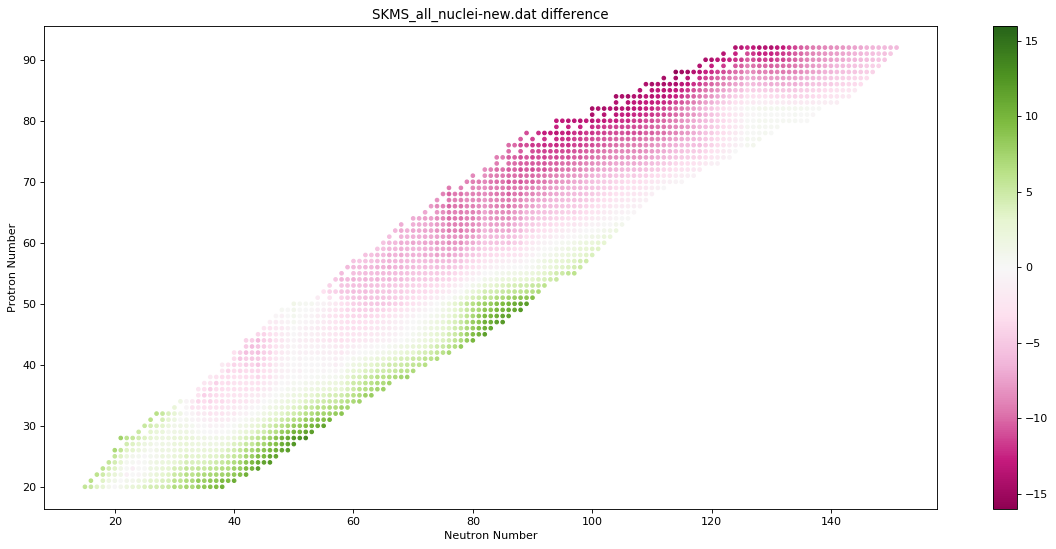

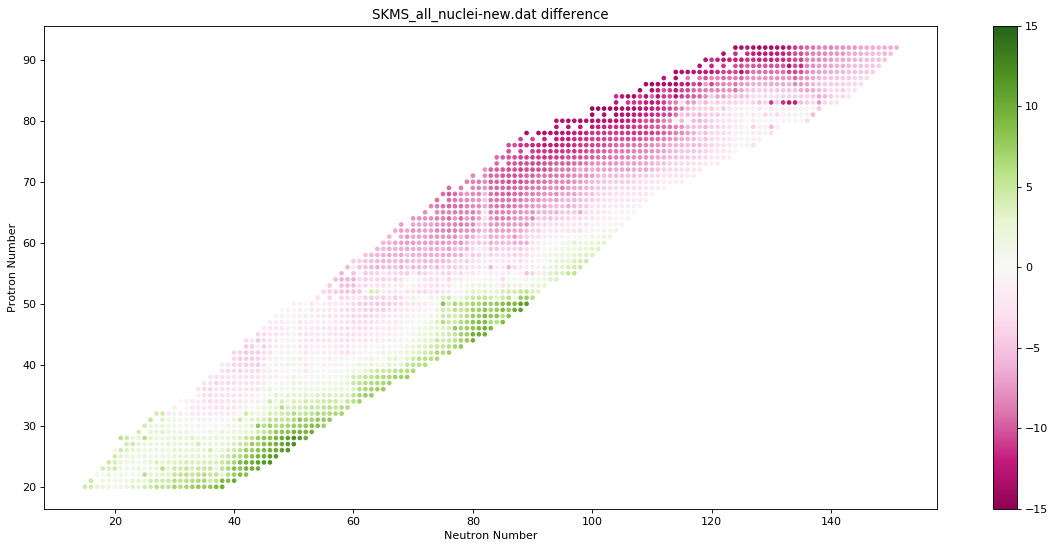

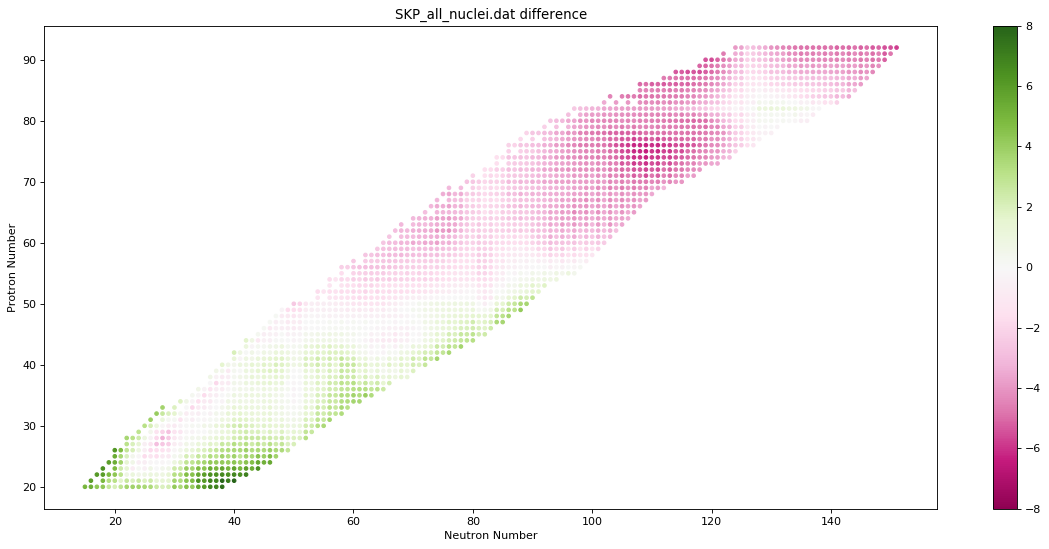

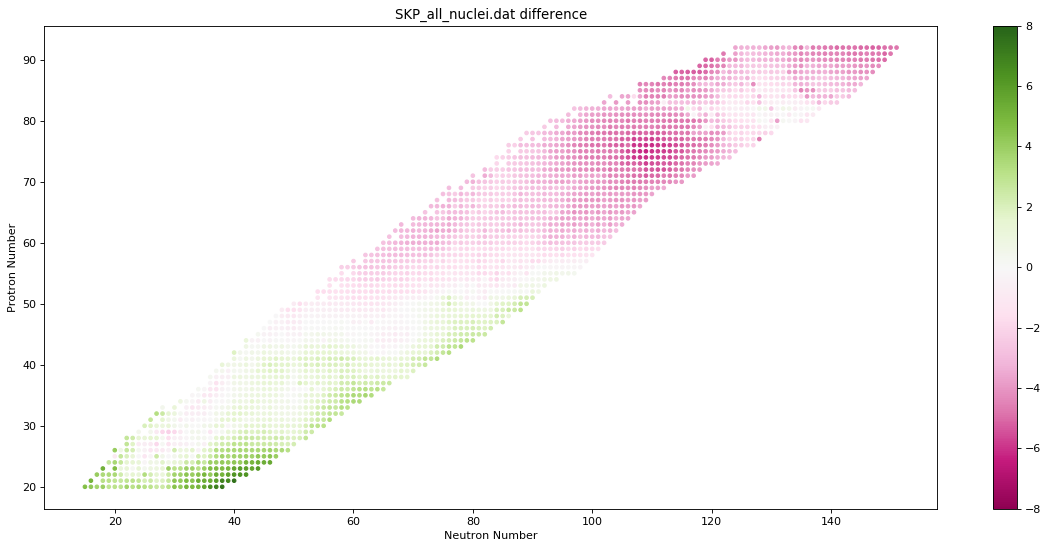

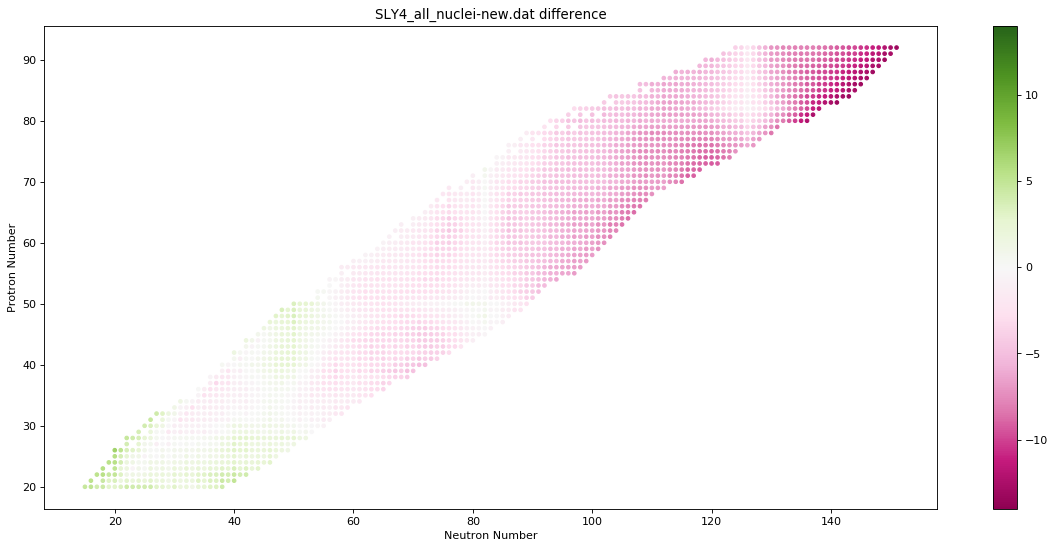

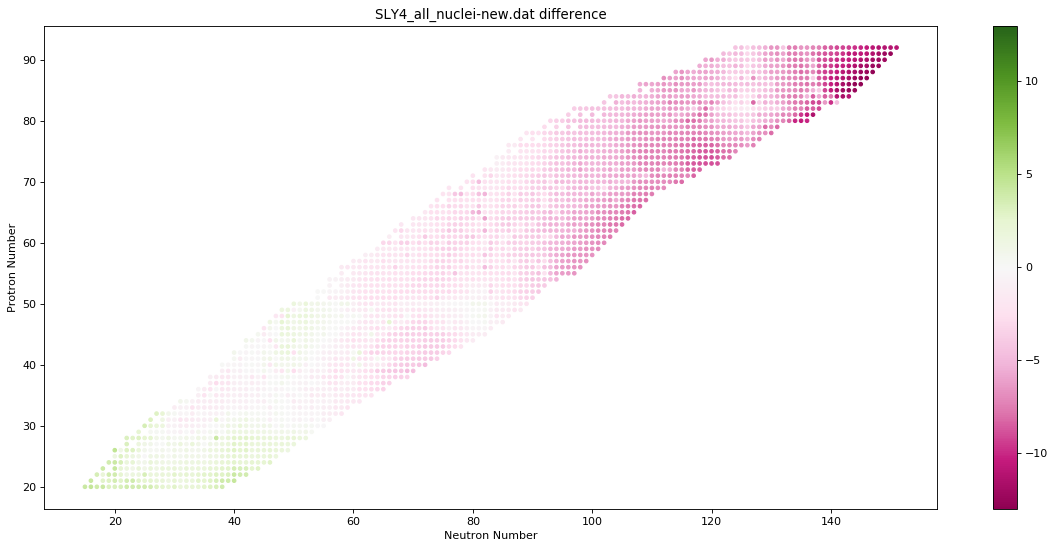

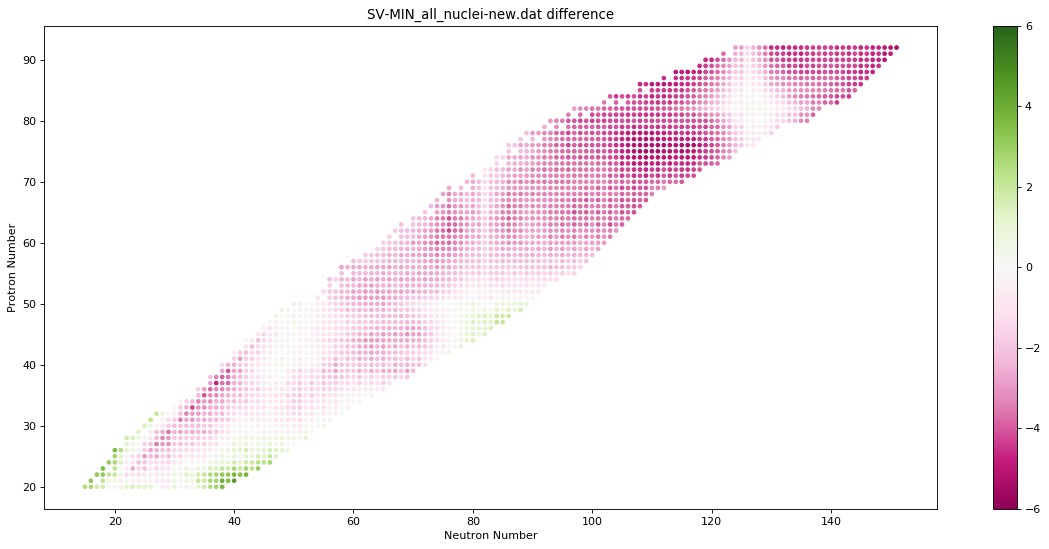

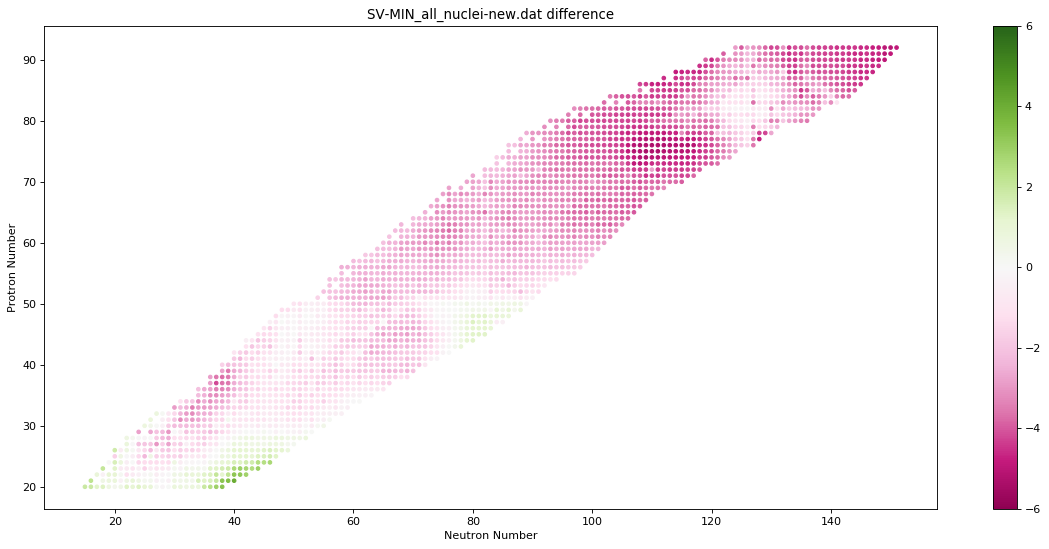

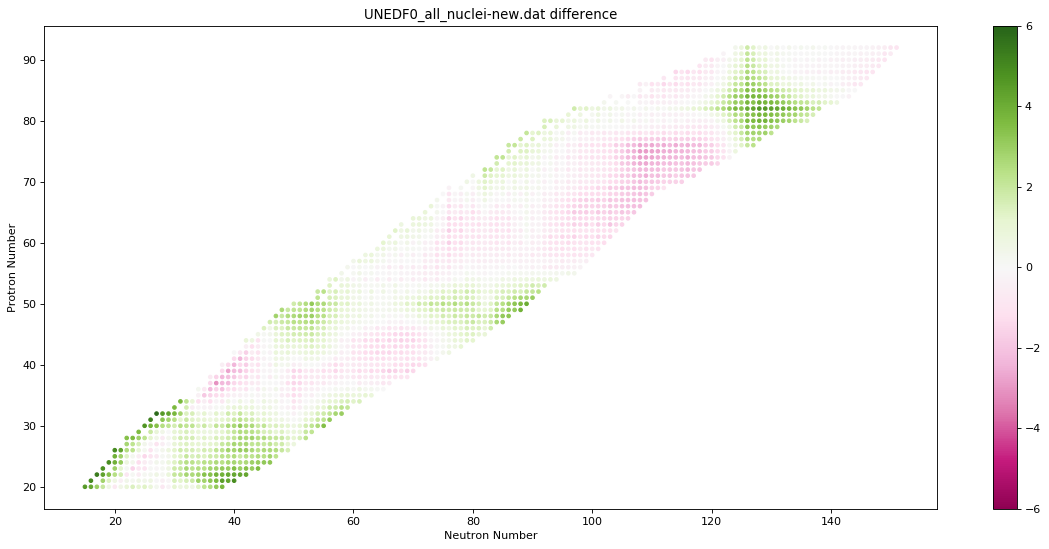

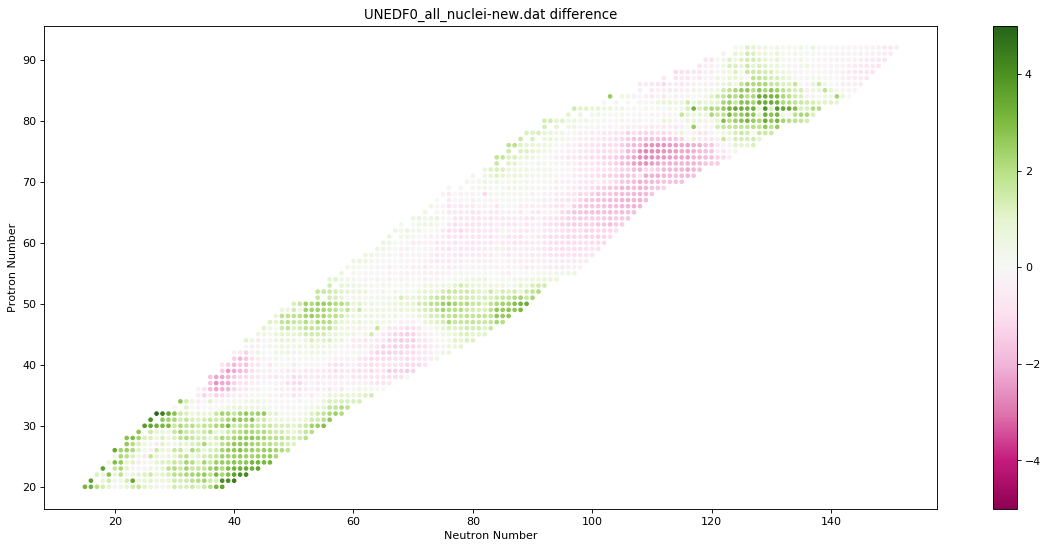

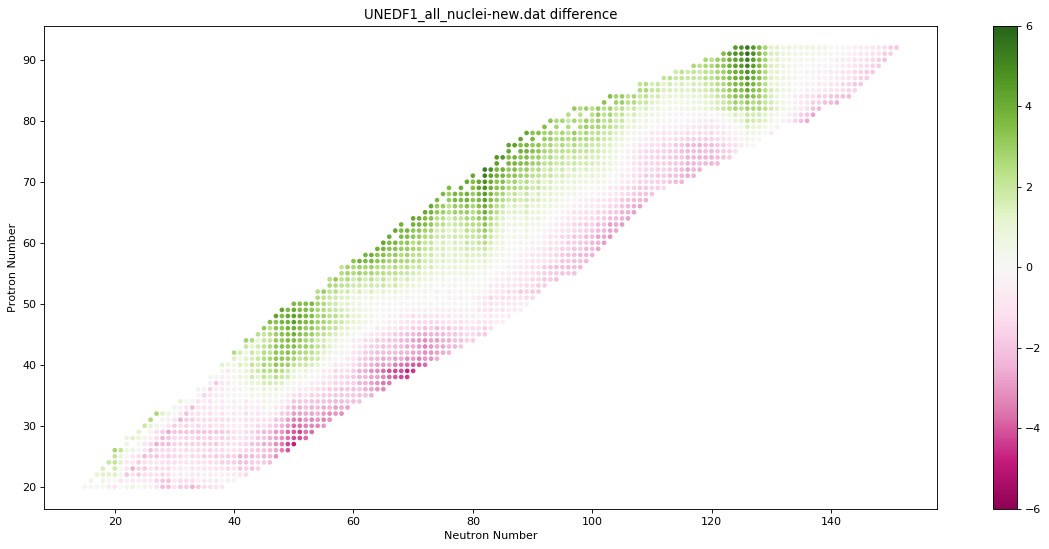

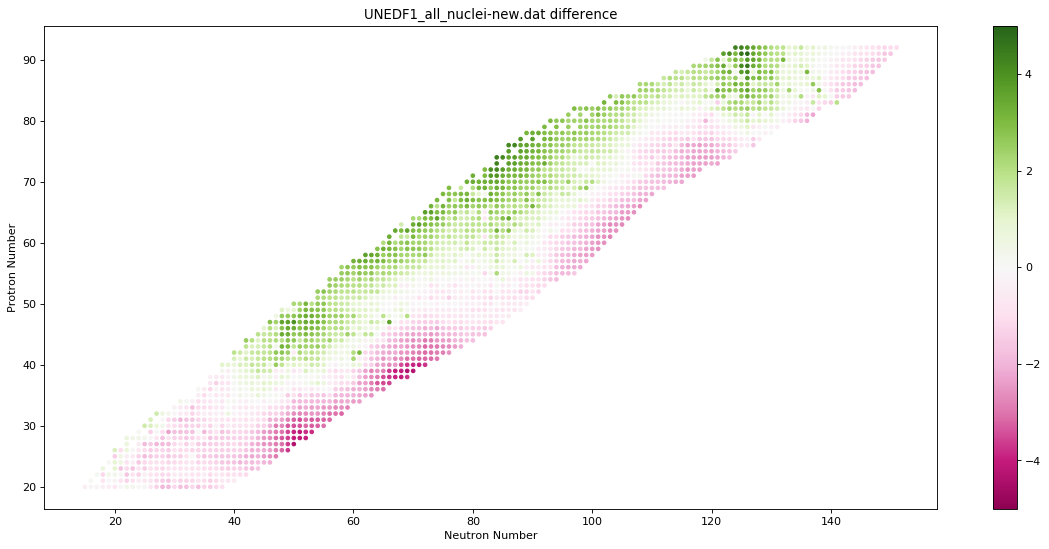

In [138]:
for i in range(0,6):
    ml_predictions[i]=np.transpose(ml_predictions[i])
    diff_w_Snexp[i]=np.transpose(diff_w_Snexp[i])
    ZQ_diff_w_Snexp[i]=np.transpose(ZQ_diff_w_Snexp[i])
    ZN_diff_w_Snexp[i]=np.transpose(ZN_diff_w_Snexp[i])
    
    
    ext = np.int(np.ceil(max(-np.min(diff_w_Snexp[i][0]),np.max(diff_w_Snexp[i][0]))))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(ZN_diff_w_Snexp[i][1],ZN_diff_w_Snexp[i][0],c=diff_w_Snexp[i][0],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i]+" difference")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(ml_predictions[i][0]),np.max(ml_predictions[i][0]))))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(ZN_diff_w_Snexp[i][1],ZN_diff_w_Snexp[i][0],c=ml_predictions[i][0],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i]+" difference")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    ml_predictions[i]=np.transpose(ml_predictions[i])
    diff_w_Snexp[i]=np.transpose(diff_w_Snexp[i])
    ZQ_diff_w_Snexp[i]=np.transpose(ZQ_diff_w_Snexp[i])
    ZN_diff_w_Snexp[i]=np.transpose(ZN_diff_w_Snexp[i])
    
    

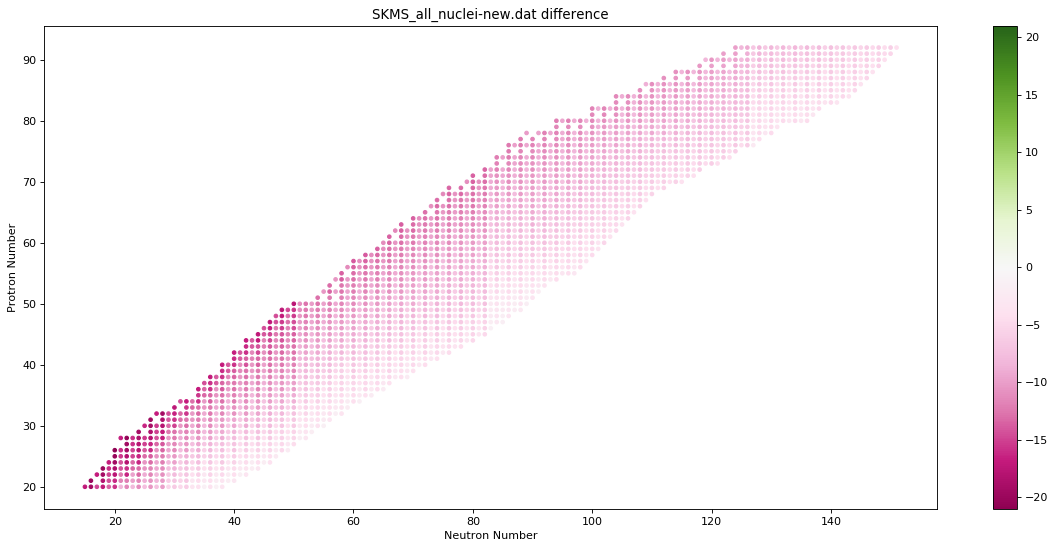

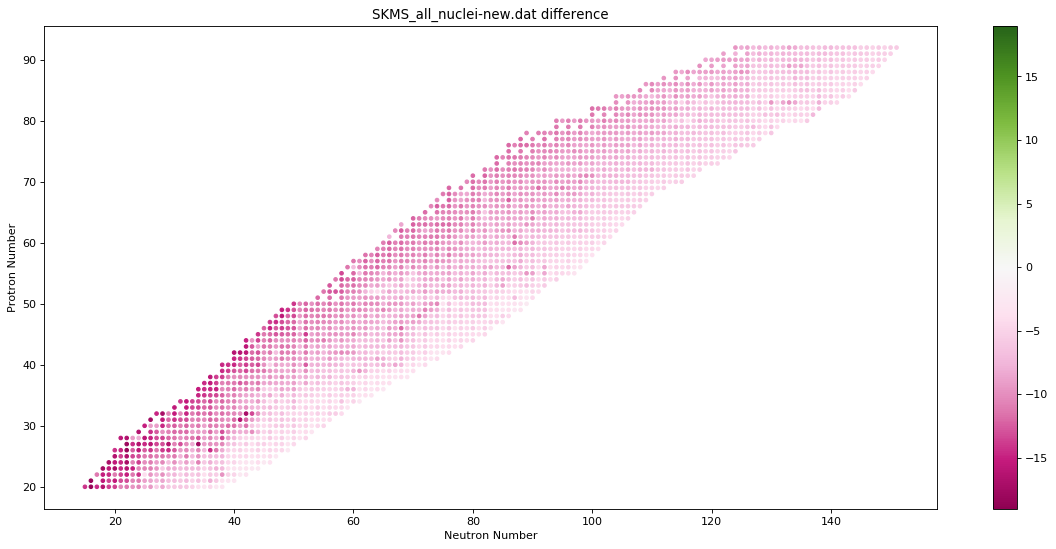

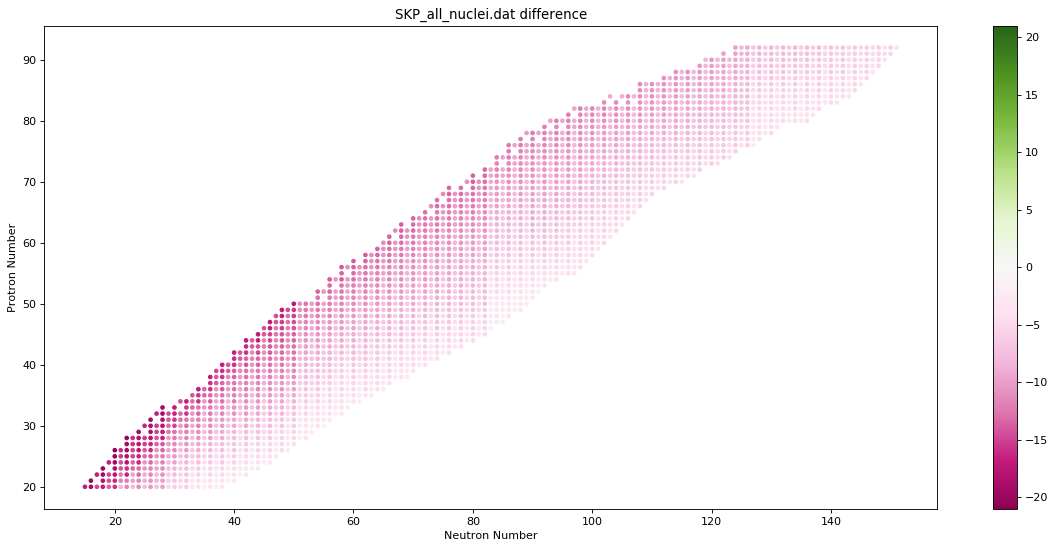

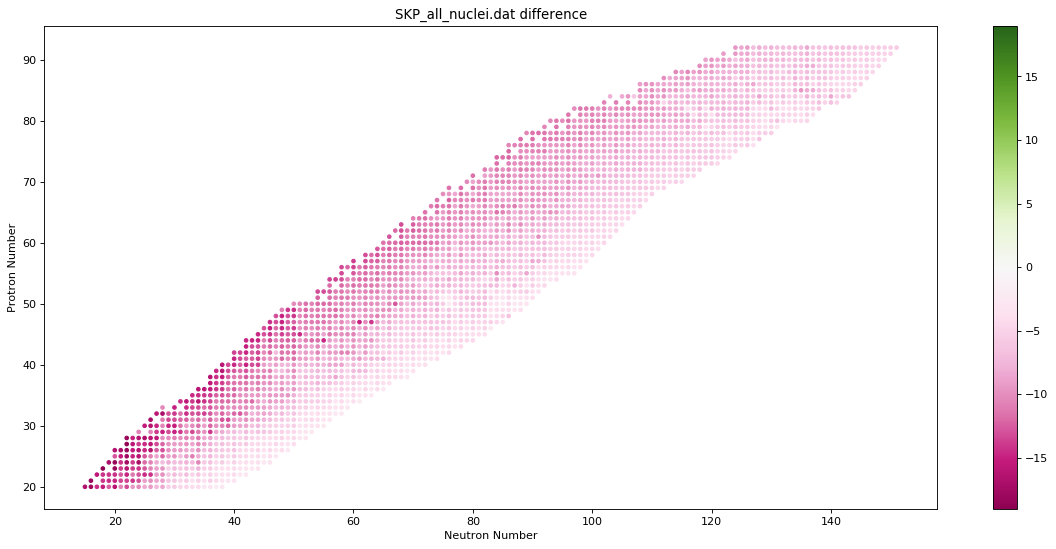

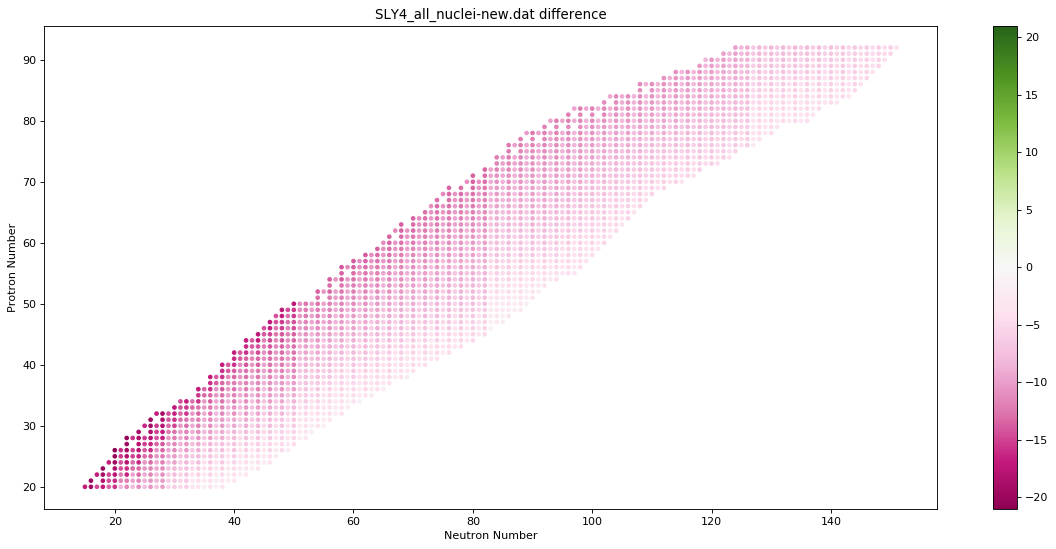

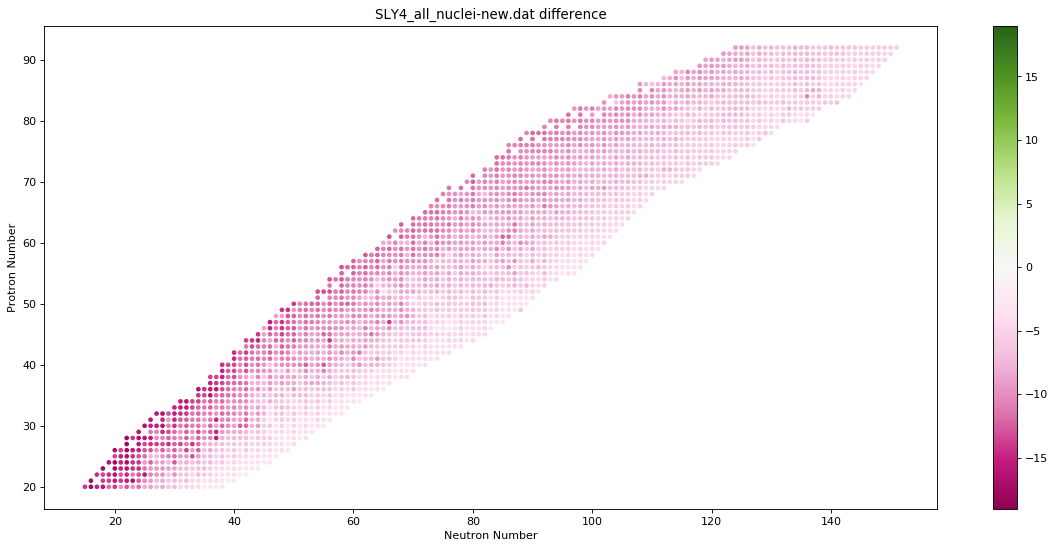

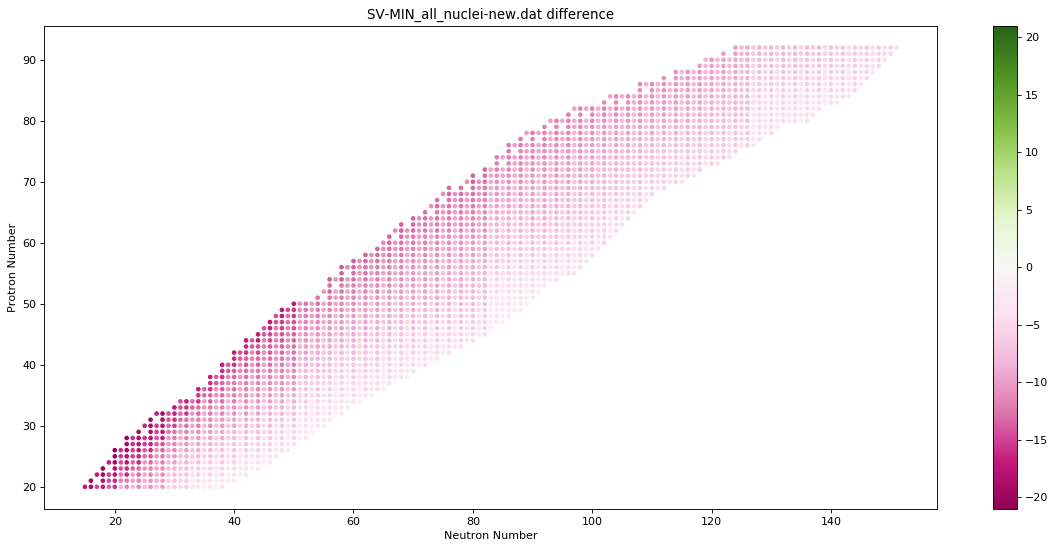

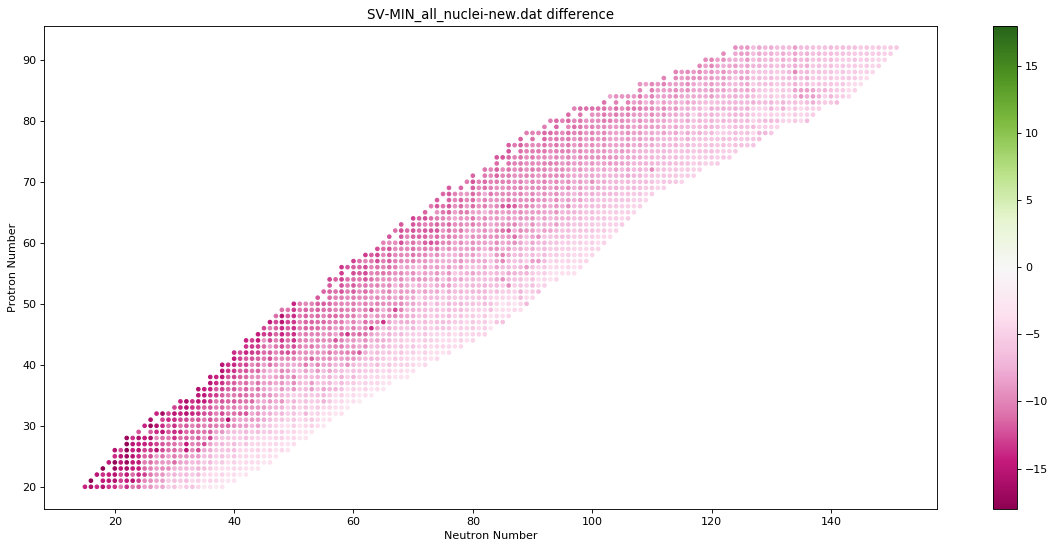

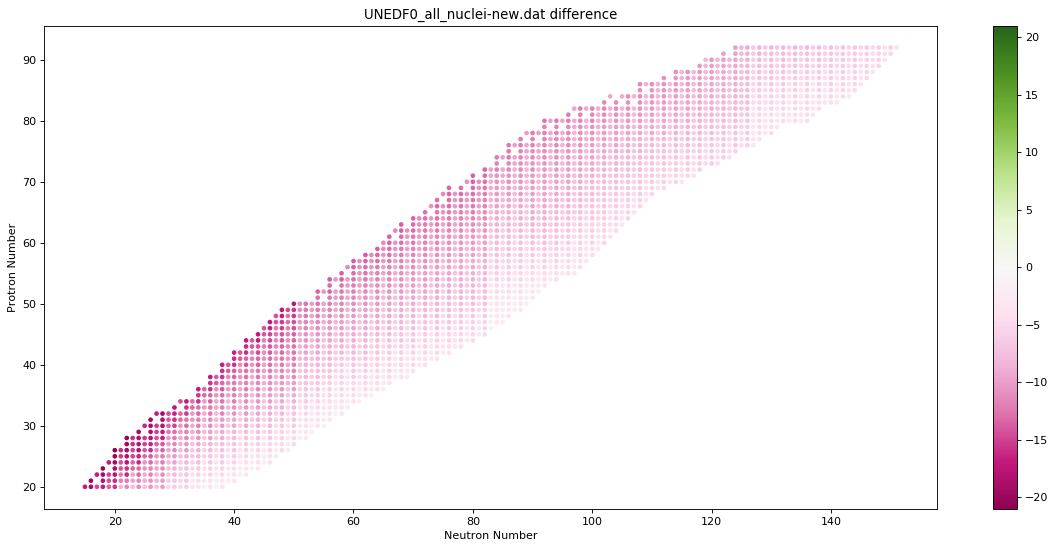

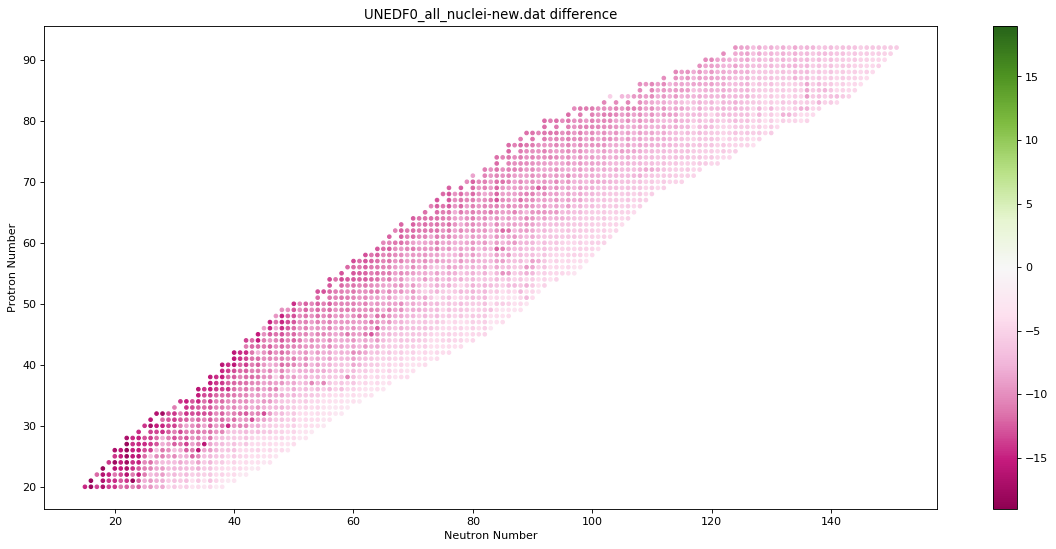

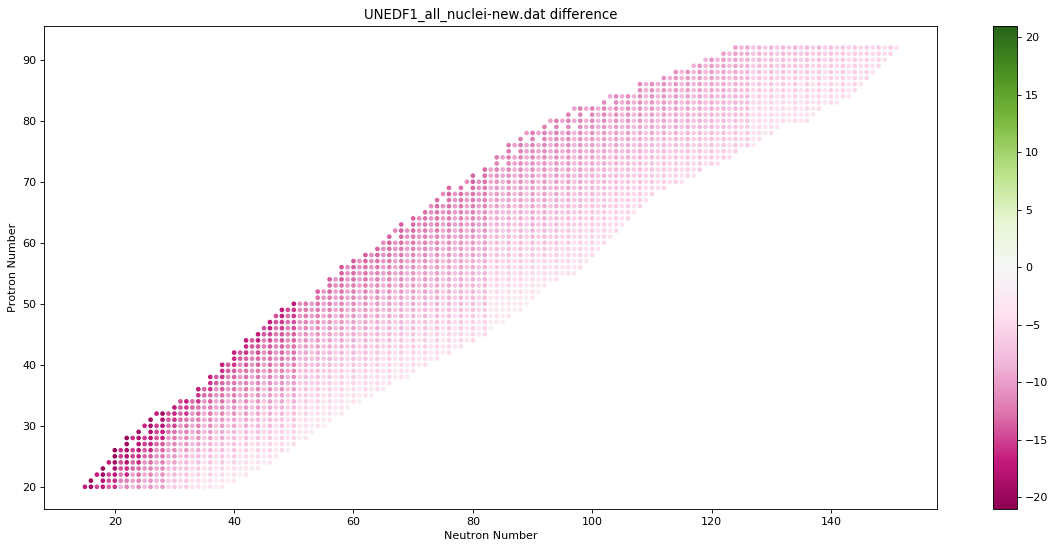

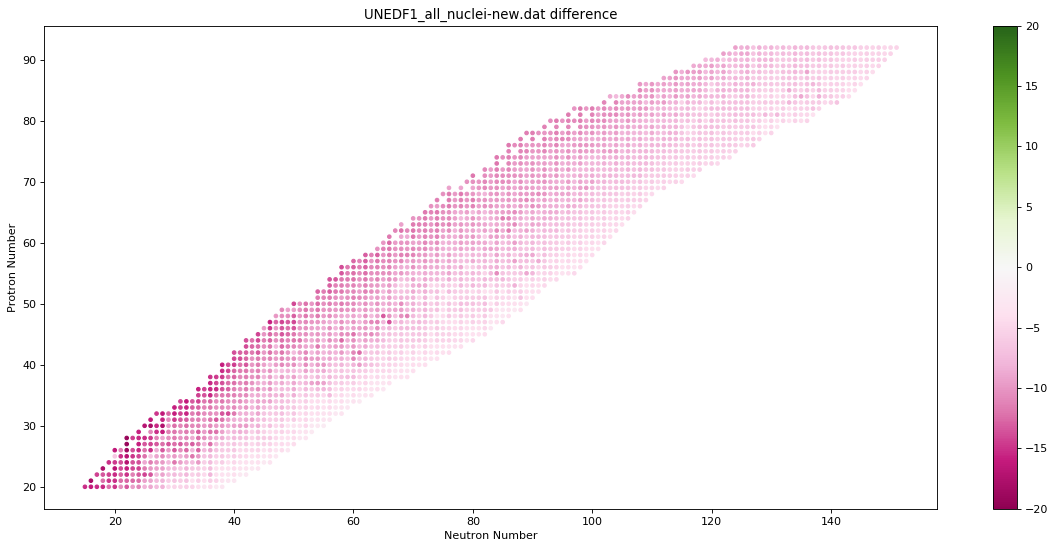

In [139]:
for i in range(0,6):
    ml_predictions[i]=np.transpose(ml_predictions[i])
    diff_w_Snexp[i]=np.transpose(diff_w_Snexp[i])
    ZQ_diff_w_Snexp[i]=np.transpose(ZQ_diff_w_Snexp[i])
    ZN_diff_w_Snexp[i]=np.transpose(ZN_diff_w_Snexp[i])
    
    
    ext = np.int(np.ceil(max(-np.min(diff_w_Snexp[i][1]),np.max(diff_w_Snexp[i][1]))))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(ZN_diff_w_Snexp[i][1],ZN_diff_w_Snexp[i][0],c=diff_w_Snexp[i][1],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i]+" difference")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(ml_predictions[i][1]),np.max(ml_predictions[i][1]))))
    fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc  = plt.scatter(ZN_diff_w_Snexp[i][1],ZN_diff_w_Snexp[i][0],c=ml_predictions[i][1],cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i]+" difference")
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()
    
    ml_predictions[i]=np.transpose(ml_predictions[i])
    diff_w_Snexp[i]=np.transpose(diff_w_Snexp[i])
    ZQ_diff_w_Snexp[i]=np.transpose(ZQ_diff_w_Snexp[i])
    ZN_diff_w_Snexp[i]=np.transpose(ZN_diff_w_Snexp[i])
    